In [68]:
# critical
import argparse
import os
import random
import time
import math

# data
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# signal processing
from scipy import signal
from scipy.stats import entropy

In [69]:
# set random seed for reproducibility
manualSeed = 99
#manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)

np.random.seed(manualSeed)

Random Seed:  99


In [70]:
generated_signals_df = pd.read_csv('../data/output/generated_signals_10000.csv', header=None)

### Generated Distribution

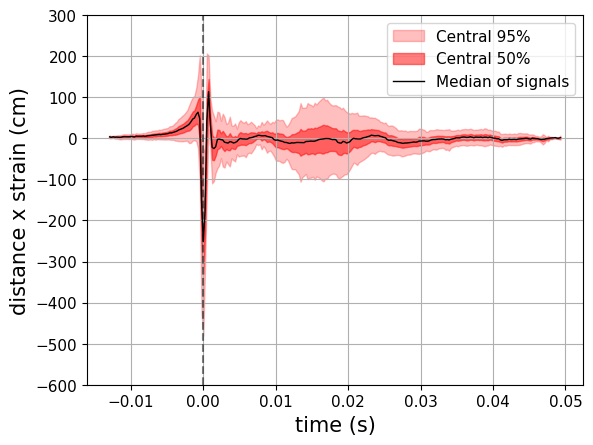

In [95]:
# Set font size globally for all plots
plt.rcParams.update({'font.size': 11})

# Compute median of signals
median_line = generated_signals_df.median(axis=1)

# Transform x values
x = [i / 4096 for i in range(0, 256)]
x = [value - (53/4096) for value in x]

# Compute central 95% interval
percentile_2_5 = generated_signals_df.quantile(0.025, axis=1)
percentile_97_5 = generated_signals_df.quantile(0.975, axis=1)
plt.fill_between(x, percentile_2_5, percentile_97_5, color='red', alpha=0.25, label='Central 95%')

# Compute central 50% interval
percentile_25 = generated_signals_df.quantile(0.25, axis=1)
percentile_75 = generated_signals_df.quantile(0.75, axis=1)
plt.fill_between(x, percentile_25, percentile_75, color='red', alpha=0.5, label='Central 50%')

plt.plot(x, median_line.values, color='k', linestyle='-', linewidth=1, alpha=1.0, label='Median of signals')

# The core bounce is at n = 203
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)  

# Set the same y-axis limits
plt.ylim(-600, 300)

# Set the same x-axis labels and title
plt.xlabel('time (s)', size=15)
plt.ylabel('distance x strain (cm)', size=15)
# plt.title('Generated Stellar Core-Collapse Wave Signal Distribution', size=20)

plt.grid(True)

plt.legend()
# Save the figure
plt.savefig('../plots/generated_signal_distribution_10000.pdf')
plt.show()
